# Heroin and Alcohol: Could There Be a Relationship?
*Daphka Alius*<br>
*March 14, 2019*

Heroin and alcohol are two of the most abused substances in the US. Heroin is a powerful non-medically prescribed opioid drug in the US. Given the current opioid epidemic, which is now a national health crisis, the aim of this project is to determine whether there is a relationship between yearly heroin consumption and yearly alcohol consumption. With that said, the question under evaluation is whether people who heavily consume one substance also consume the other at similar rates.


In [1]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
# import plotly as py
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import linregress

## Data Collection

*Data Collection from NSDUH for 2017*

In [2]:
datapath = "/Users/daphka/Google Drive/ThinkStats2/project1/NSDUH DATA/NSDUH-2017-DS0001-bndl-data-stata/NSDUH_2017.DTA"
df2017 = pd.read_stata(datapath, convert_categoricals=False)

In [3]:
data = df2017
len(data)

56276

## Analyzing Demographics: Can we describe the respondents of the survey?

1. Let's look at the breakdown of the age groups in the survey.

In [4]:
age = data["catage"]
age.value_counts()/len(age)

4    0.354112
2    0.245931
1    0.243834
3    0.156123
Name: catage, dtype: float64

In summary, we get the breakdown of age to be:
* 35.4% were between the age of 12-17
* 24.5% between the age of 18-25
* 24.3% between the age of 26-34
* 15.6% were 35 and above


This breakdown can be illustrated by a bar graph.

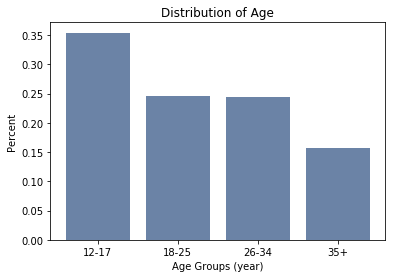

In [5]:
thinkplot.Bar(["12-17", "18-25", "26-34", "35+"], age.value_counts()/len(age))
thinkplot.Config(title= "Distribution of Age", xlabel = "Age Groups (year)", ylabel = "Percent")


Majority of the respondents were youths and young adults between the age 12-25, which corresponds to 59.9% of the respondents.

2. Now we will look at the break down of race!

In [6]:
race = data["NEWRACE2"]
race.value_counts()/len(race)

1    0.588475
7    0.181534
2    0.125222
5    0.046752
6    0.038364
3    0.015033
4    0.004620
Name: NEWRACE2, dtype: float64

In summary, the breakdown of race is the following:
* 58.8% Caucasian
* 18.1% Hispanic
* 12.5% Black or African American
* 4.6% Asian
* 1.5% Native American and AK Natives
* 0.6% HI/Pacific Islander
* 3.8% more than one race


Here's a bar graph representing the breakdown of race:

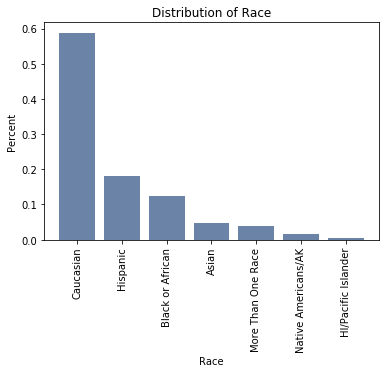

In [7]:
thinkplot.Bar(["Caucasian", "Hispanic", "Black or African", "Asian", "More Than One Race", "Native Americans/AK", "HI/Pacific Islander"], race.value_counts()/len(race))
thinkplot.Config(xlabel = "Race", ylabel = "Percent", title = "Distribution of Race")
plt.xticks(rotation="vertical")
plt.show()

The racial makeup of the distribution is remarkable representative of the US.

3. Finally, we will look at the breakdown of respondent's education.

In [8]:
education = data["eduhighcat"]
education.value_counts()/len(education)

3    0.253892
5    0.243834
4    0.206162
2    0.200245
1    0.095867
Name: eduhighcat, dtype: float64

In summary, we get the following:
* 9.59% Less high school
* 20.0% High school grad
* 25.3% Some coll/Assoc Dg
* 20.6% College graduate
* 24.38% 12 to 17 year olds


Here's a bar graph to display the distribution of education.

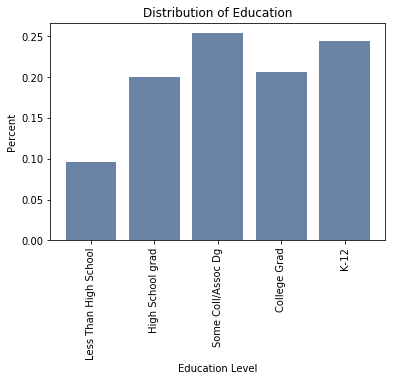

In [9]:
thinkplot.Bar(["Less Than High School", "High School grad", "Some Coll/Assoc Dg", "College Grad", "K-12"], education.value_counts().sort_index()/len(education))
thinkplot.Config(xlabel = "Education Level", ylabel = "Percent", title = "Distribution of Education")
plt.xticks(rotation="vertical")
plt.show()

Most of the respondents were youths and young adults between the age of 12-25, which corresponds to the high percentage of people in K-12 and have had some college at the time they were surveyed.

## Analyzing variables: "alcyrtot" and "heryrtot"
* alcyrtot: reports the alcohol consumption of a respondent over the  past 12 months or 365 days
* heryrtot: reports the heroin consumption of a respondent over the  past 12 months or 365 days

### alcyrtot: past 12 months of alcohol use

Let's look into the variable "alcyrtot". But first, we'll remove the non-quantitative variables with np.nan values.

In [10]:
data["alcyrtot"].replace([985, 991, 993, 994, 997, 998], np.nan, inplace=True)
data["heryrtot"].replace([985, 991, 993, 994, 997, 998], np.nan, inplace=True)


Now we will drop the nan values to do some analysis on the distribution of the reported data.

<h3>Summary Statistics</h3>

We will be using Histogram to see the shape of the distribution of alcohol consumption.

In [11]:
alcoholUsedPast12MO = data["alcyrtot"].dropna()
alcoholUsedPast12MO.skew()

1.3839023388653218

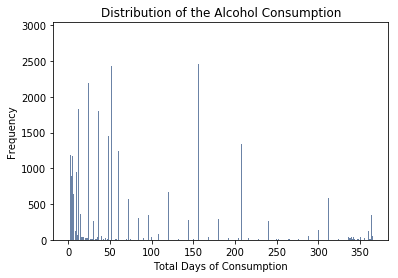

In [12]:
alcoholUsedPast12MOHist = thinkstats2.Hist(alcoholUsedPast12MO)
thinkplot.Hist(alcoholUsedPast12MOHist)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel = "Frequency", title = "Distribution of the Alcohol Consumption")

As can be observed in this histogram, the share of the distribution of alcohol consumption can be described as being multi-modal, asymmetric and right-skewed.

Since the histogram doesn't really provide much insight into the usage, grouping the data into frequency of use and see what percentage of people fall into each group can give us better results on the respondents' consumption behavior.

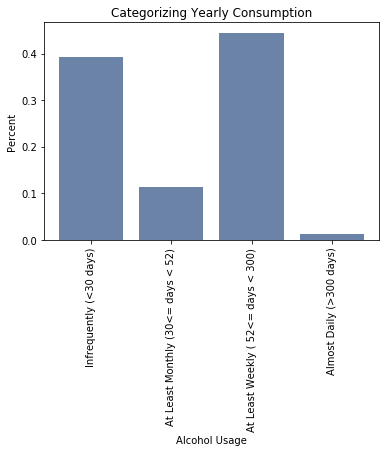

In [13]:
infrequent = alcoholUsedPast12MO[alcoholUsedPast12MO < 30]
#at least once a month
criteria1 = alcoholUsedPast12MO >= 30
criteria2 = alcoholUsedPast12MO < 52
month_criteria = criteria1 & criteria2
monthly = alcoholUsedPast12MO[month_criteria]

#at least weekly
criteria3 = alcoholUsedPast12MO >= 52
criteria4 = alcoholUsedPast12MO < 300
weekly_criteria = criteria3 & criteria4
weekly = alcoholUsedPast12MO[weekly_criteria]

daily = alcoholUsedPast12MO[alcoholUsedPast12MO>360]
thinkplot.Bar(["Infrequently (<30 days)", "At Least Monthly (30<= days < 52)", "At Least Weekly ( 52<= days < 300)","Almost Daily (>300 days)"],[len(infrequent)/len(alcoholUsedPast12MO), len(monthly)/len(alcoholUsedPast12MO), len(weekly)/len(alcoholUsedPast12MO), len(daily)/len(alcoholUsedPast12MO)])
thinkplot.Config(xlabel = "Alcohol Usage", ylabel = "Percent", title="Categorizing Yearly Consumption")
plt.xticks(rotation = "vertical")
plt.show()

Majority of the respondents can be categorized as either infrequent alcohol drinkers or were consuming alcohol at least weekly during the time they were being surveyed.

Another way of visualizing the distribution of this variable is with its probability mass function.

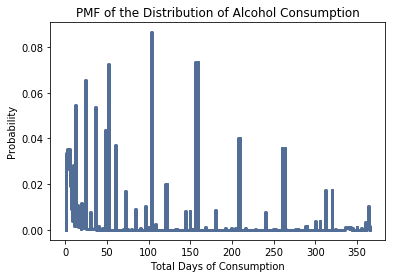

In [14]:
alcoholUsedPast12MOPmf = thinkstats2.Pmf(alcoholUsedPast12MO)
thinkplot.Pmf(alcoholUsedPast12MOPmf)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel = "Probability", title = "PMF of the Distribution of Alcohol Consumption")

As can be observed, this probability mass function looks similar to the histogram and it doesn't really tell us more than we had already observed.

Can the Cumulative Distribution Function tell us a little more about our distribution from a more analytical perspective?

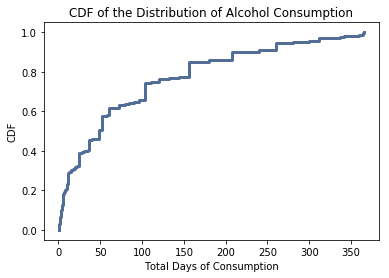

In [15]:
alcoholUsedPast12MOCdf = thinkstats2.Cdf(alcoholUsedPast12MO)
thinkplot.Cdf(alcoholUsedPast12MOCdf)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel = "CDF", title = "CDF of the Distribution of Alcohol Consumption")

Based on the shape of the CDF, we can hypothesize that the distribution of alcohol consumption looks very similar to to the Weibull analytic distribution model. Can we confirm this hypothesis? We will compare our distribution to a series of analytic distribution to determine if they can be modeled by any of the well-known distribution models.

The following functions allow you to plot the CDF of the distribution of alcohol consumption against a Gaussian model as well as looking at the Normal Plot to confirm from if the model fits well.

In [16]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label) #plots percentile of values

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [17]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

n, mean, std 33532 80.33293773963848 87.3373488181064


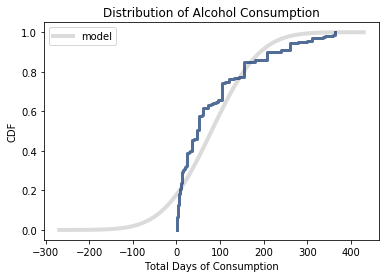

In [18]:
MakeNormalModel(alcoholUsedPast12MO, label='')

thinkplot.Config(title='Distribution of Alcohol Consumption', 
         xlabel='Total Days of Consumption', 
         ylabel='CDF')

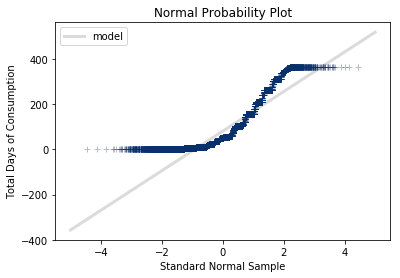

In [19]:

MakeNormalPlot(alcoholUsedPast12MO, label='')

thinkplot.Config(title='Normal Probability Plot', 
         xlabel='Standard Normal Sample', 
         ylabel='Total Days of Consumption')

Both the Gaussian CDF and Normal Sample Plot has shown that the data cannot be modeled using a Gaussian analytic model. So can it be modeled using an exponential analytic distribution?

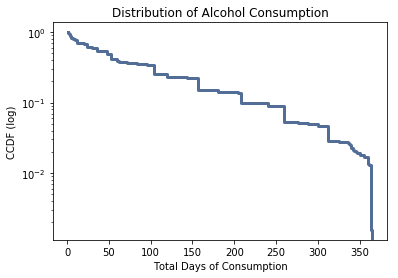

In [20]:
thinkplot.Cdf(alcoholUsedPast12MOCdf, complement=True)
thinkplot.Config(title='Distribution of Alcohol Consumption', 
         xlabel='Total Days of Consumption', 
         ylabel='CCDF (log)',
         yscale = "log")

While the CCDF shows a somewhat linear pattern, which is an indication that the data could potentially be modeled using an exponential analytical distribution, there's a lot of constant intervals. Could there be a better fit?

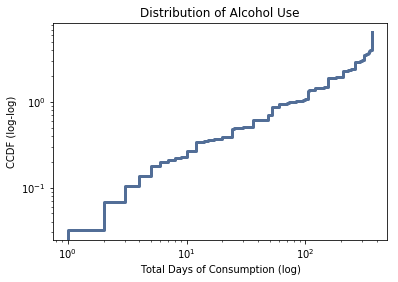

In [21]:
thinkplot.Cdf(alcoholUsedPast12MOCdf, transform = "weibull")
thinkplot.Config(title = "Distribution of Alcohol Use",
                 xlabel = "Total Days of Consumption (log)",
                 ylabel = "CCDF (log-log)",
                 yscale = "log", xscale = "log")

Plotting this distribution on a log-log y scale and a log x scale, we can see the linear pattern of a typical Weibull distribution. This is another confirmation that the data could be modeled using an exponential distribution since exponential distributions are a special case of Weibull. Exponential Distributions typically measure the inter-arrival time between events of a random variable. In this case, we are measuring the number of days (time) of alcohol consumption which is also a random variable that can take values between 0 - 365 days, making the exponential model a good fit for our dataset.

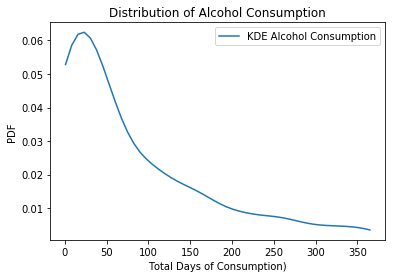

In [22]:
kde = gaussian_kde(alcoholUsedPast12MO, bw_method=0.3)

xs = np.linspace(alcoholUsedPast12MO.min(), alcoholUsedPast12MO.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Alcohol Consumption')

thinkplot.Config(xlabel='Total Days of Consumption)', ylabel='PDF', title = "Distribution of Alcohol Consumption")

This is a smoother version of what the PDF of the distribution of Alcohol consumption looks like using a KDE which is an algorithm use to estimate the densities.

In [23]:
alcoholUsedPast12MO.describe()

count    33532.000000
mean        82.375880
std         91.318878
min          1.000000
25%         12.000000
50%         48.000000
75%        120.000000
max        365.000000
Name: alcyrtot, dtype: float64

Lastly by looking at the summary statistics, we can numerically characterize the center and variation of the distribution of alcohol consumption. It is noted that the mean of alcohol consumption over 12 months is 82.4 days and the median is 48 days. Another observations that can be made using the median value which means that 50% of the observations fall below or are equal to 48.0 days is that a good portion of the observations are small, which is another characterization of a Weibull distribution.

## heryrtot: Past 12 Months of Heroin Use

Now we will look into the other variable "heryrtot" which looks at the distribution of heroin use over the past 12 months.

We will now look at the histogram of "heryrtot" to get a good visualization of the distribution of the observations.

In [24]:
heroinUsedPast12MO = data["heryrtot"].dropna()
heroinUsedPast12MO.skew()

0.7344488836309345

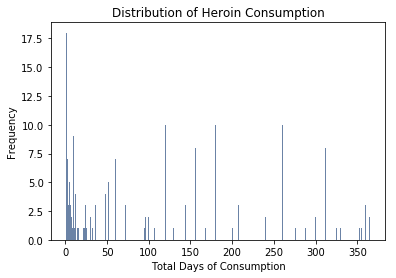

In [25]:
heroinUsedPast12MOHist = thinkstats2.Hist(heroinUsedPast12MO)
thinkplot.Hist(heroinUsedPast12MOHist)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel = "Frequency", title = "Distribution of Heroin Consumption")

Based on the graph, we can see that the shape of the distribution is multi-modal, asymmetric and right skewed, which is confirmed by the positive measure of skewness above. Due to the spread of the frequency bins, we can see that there's a lot of variability in the observations.

Once again the histogram doesn't really provide much insight into the usage, grouping the data into frequency of use and see what percentage of people fall into each group can give us better results on the respondents' consumption behavior.

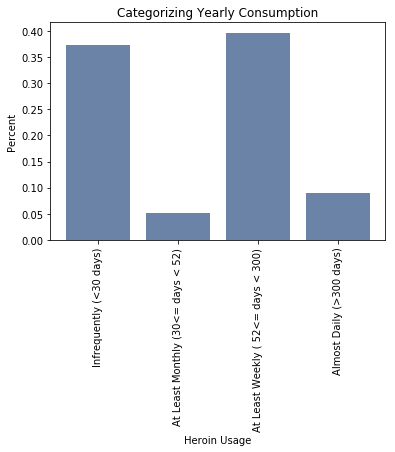

In [26]:
infrequent_her = heroinUsedPast12MO[heroinUsedPast12MO < 30]
#at least once a month
criteria1_her = heroinUsedPast12MO >= 30
criteria2_her = heroinUsedPast12MO < 52
month_criteria_her = criteria1_her & criteria2_her
monthly_her = heroinUsedPast12MO[month_criteria_her]

#at least weekly
criteria3_her = heroinUsedPast12MO >= 52
criteria4_her = heroinUsedPast12MO < 300
weekly_criteria_her = criteria3_her & criteria4_her
weekly_her = heroinUsedPast12MO[weekly_criteria_her]

daily_her = heroinUsedPast12MO[heroinUsedPast12MO>360]

thinkplot.Bar(["Infrequently (<30 days)", "At Least Monthly (30<= days < 52)", "At Least Weekly ( 52<= days < 300)","Almost Daily (>300 days)"],[len(infrequent_her)/len(heroinUsedPast12MO), len(monthly_her)/len(heroinUsedPast12MO), len(weekly_her)/len(heroinUsedPast12MO), len(daily_her)/len(heroinUsedPast12MO)])
thinkplot.Config(xlabel = "Heroin Usage", ylabel = "Percent", title="Categorizing Yearly Consumption")
plt.xticks(rotation = "vertical")
plt.show()


Can the probability mass function tell us more about this distribution?

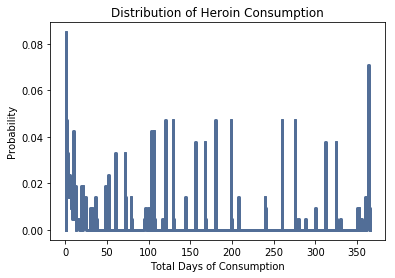

In [27]:
heroinUsedPast12MOPmf = thinkstats2.Pmf(heroinUsedPast12MO)
thinkplot.Pmf(heroinUsedPast12MOPmf)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel = "Probability", title = "Distribution of Heroin Consumption")

The PMF shows the same shape from the histogram where there's a high concentration of small values around the tens and large values around 360 days.

What about the Cumulative Distribution Function? Can it tell us more?

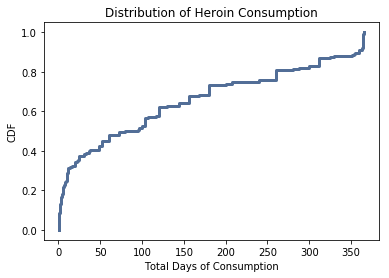

In [28]:
heroinUsedPast12MOCdf = thinkstats2.Cdf(heroinUsedPast12MO)
thinkplot.Cdf(heroinUsedPast12MOCdf)
thinkplot.Config(xlabel = "Total Days of Consumption", ylabel="CDF", title = "Distribution of Heroin Consumption")

Given that we're measuring time, we see that the CDF looks very similar to the distribution of alcohol consumption. Therefore, we can hypothesize that the dataset can be modeled using an exponential/Weibull distribution. To confirm this, we will plot the distribution against different scales that will easily tell us if that's true.

In this plot, we look at the CCDF on a log-y scale and we expect to see a linear pattern if the data can be modeled using an exponential distribution.

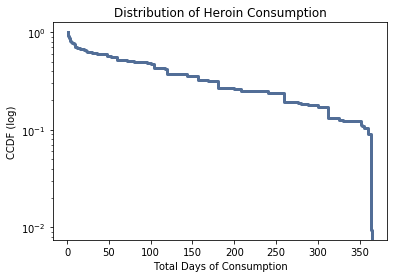

In [29]:
thinkplot.Cdf(heroinUsedPast12MOCdf, complement=True, label='')
thinkplot.Config(xlabel="Total Days of Consumption", ylabel = "CCDF (log)", title = "Distribution of Heroin Consumption", yscale='log')

For the most part, we can see that the data takes on a linear pattern, a marker that it can modeled using an exponential analytical distribution.

Next, we plot it using a Weibull transformation to see the CCDF on a log-log(y) scale and a log(x) scale.

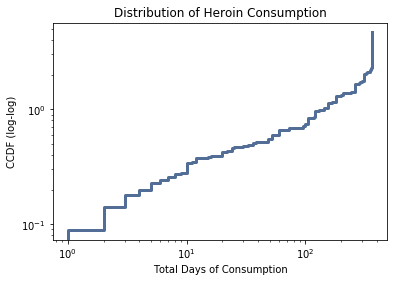

In [30]:
thinkplot.Cdf(heroinUsedPast12MOCdf, transform = "weibull")
thinkplot.Config(title = "Distribution of Heroin Consumption",
                 xlabel = "Total Days of Consumption", 
                 ylabel = "CCDF (log-log)",
                 yscale = "log", xscale = "log")

Again, we see that the data is linear, another confirmation that the exponential/Weibull distribution might be a great fit for our dataset.

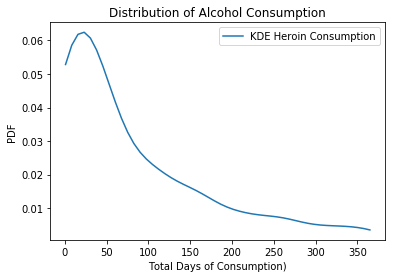

In [31]:
kde_her = gaussian_kde(heroinUsedPast12MO, bw_method=0.3)

xs_her = np.linspace(heroinUsedPast12MO.min(), heroinUsedPast12MO.max())
ds_her = kde.evaluate(xs_her)
ds_her /= ds_her.sum()

plt.plot(xs_her, ds_her, label='KDE Heroin Consumption')

thinkplot.Config(xlabel='Total Days of Consumption)', ylabel='PDF', title = "Distribution of Alcohol Consumption")

In [32]:
heroinUsedPast12MO.describe()

count    212.000000
mean     125.066038
std      128.519331
min        1.000000
25%       10.000000
50%       87.500000
75%      216.000000
max      365.000000
Name: heryrtot, dtype: float64

# Correlation Analysis

## Scatterplot and Linear Regression

Now we will plot the two variables on a scatterplot to see if there exists a linear relationship between them. 

In [33]:
alcoholUsedPast12MONAN = data["alcyrtot"]
heroinUsedPast12MONAN = data["heryrtot"]
len(alcoholUsedPast12MONAN), len(heroinUsedPast12MONAN)

(56276, 56276)

LinregressResult(slope=-0.27983148967809446, intercept=140.3996268371461, rvalue=-0.22416009409678647, pvalue=0.003907859976324315, stderr=0.09558416331698188)

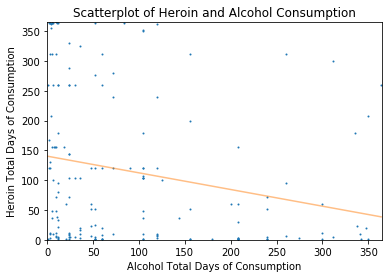

In [34]:
plt.plot(alcoholUsedPast12MONAN, heroinUsedPast12MONAN, 'o', markersize =1)

plt.title("Scatterplot of Heroin and Alcohol Consumption")
plt.xlabel('Alcohol Total Days of Consumption')
plt.ylabel('Heroin Total Days of Consumption')
plt.axis([0, 365, 0, 365]);



subset = data.dropna(subset=['alcyrtot', 'heryrtot']) #drops nan from multiple columns using subset as a parameter of dropna()

xs = subset["alcyrtot"] #x-values
ys = subset["heryrtot"]#y-values

res = linregress(xs, ys) #LSE - minimizes the error

# plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)
res

As you can see there's a weak negative correlation between the two variables. The scatter plot shows that most people who consume alcohol don't typically consume heroin because all the points are fall along the axis of the two variables. Very few points demonstrate the linear relationship between the two. The correlation coefficient is -0.28 and the p-value is 0.003 with a standard error of 0.1. Other than the negative relationship shown by the best fit line, it's hard to determine any relationships between the two variables, so we're going to take another approach to see if there's anything we can say conclusively about the two variables.

### Does a better relationship exists between the two variables?

First, we will group the data by days of consumption of alcohol and we will select the column of heroin consumption.

In [35]:
groups2 = data.groupby("alcyrtot")["heryrtot"]

Then we will group the data into infrequently, almost daily, at least weekly, and at least monthly and take the mean of those groups.

In [36]:
infrequent_c=[]
monthly_c=[]
weekly_c = []
daily_c = []
for day, df in groups2:
    if day < 30:
        if not np.isnan(df.mean()):
            infrequent_c.append(df.mean())
    elif 30 <= day < 52:
        if not np.isnan(df.mean()):
            monthly_c.append(df.mean())
    elif 52 <= day < 300:
        if not np.isnan(df.mean()):
            weekly_c.append(df.mean())
    else:
        if not np.isnan(df.mean()):
            daily_c.append(df.mean())

Then I define a function **meanOfMeans** that will take the mean of these groups to show the average total days of heroin consumption in each group.

In [37]:
def meanOfMeans(aList):
    meanSum=0
    listLength = 0
    for mean in aList:
        meanSum+= mean
        listLength+=1
    return meanSum/listLength
        

In [38]:
meansList2 = [meanOfMeans(infrequent_c), meanOfMeans(monthly_c), meanOfMeans(weekly_c), meanOfMeans(daily_c)]
meansList2[3]

86.25925925925927

Lastly, I plot the mean of means, to see how heroin consumption differs in each groups.

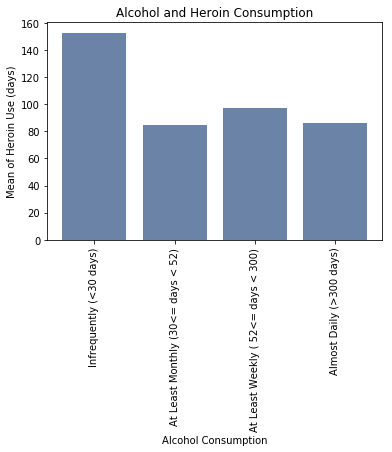

In [41]:
thinkplot.Bar(["Infrequently (<30 days)", "At Least Monthly (30<= days < 52)", "At Least Weekly ( 52<= days < 300)","Almost Daily (>300 days)"], meansList2)
thinkplot.Config(xlabel = "Alcohol Consumption", ylabel = "Mean of Heroin Use (days)", title = "Alcohol and Heroin Consumption")
plt.xticks(rotation="vertical")
plt.show()

As can be seen from the bar plot above, the group that averaged the highest total days of heroin consumption corresponds to the group that infrequently consume alcohol with an average of 152 days as compared to the group that uses heroin almost daily, which averaged about 86 total days of heroin use. The infrequent group averaged about 1.7 times less than the daily group.

### GRAPHICS

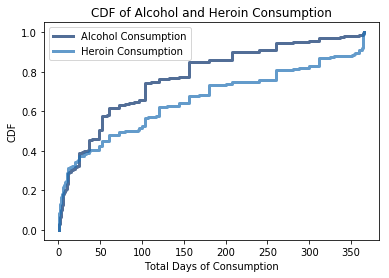

In [40]:
thinkplot.Cdf(alcoholUsedPast12MOCdf, label="Alcohol Consumption")
thinkplot.Cdf(heroinUsedPast12MOCdf, label="Heroin Consumption")
thinkplot.Config(xlabel= "Total Days of Consumption", ylabel = "CDF", title="CDF of Alcohol and Heroin Consumption")